<a href="https://colab.research.google.com/github/Yasmine-ChemP/GMCtraining/blob/main/Auto_Encoder_Denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

In [ ]:
def preprocess(array):
    """
    Normalizes the supplied array and reshapes it into the appropriate format.
    """

    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array


def noise(array):
    """
    Adds random noise to each image in the supplied array. to simulate corrupt image
    """

    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)

In [ ]:
# Since we only need images from the dataset to encode and decode, we
# won't use the labels.
(train_data, _), (test_data, _) = mnist.load_data()

# Normalize and reshape the data
train_data = preprocess(train_data)
test_data = preprocess(test_data)

# Create a copy of the data with added noise
noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)


#display the train data and a version of it with added noise
#display( train_data, noisy_train_data)



11501568/11490434 [==============================] - 0s 0us/step


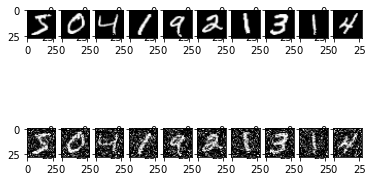

In [ ]:
for i in range(10):
  ax=plt.subplot(2,10,i+1)
  plt.imshow(train_data[i].reshape(28,28))
  plt.gray()
  

  ax=plt.subplot(2,10,i+1+10)
  plt.imshow(noisy_train_data[i].reshape(28,28))
  plt.gray()

plt.show()

In [ ]:
input= layers.Input(shape=(28,28,1))

#encoder

x=layers.Conv2D(32,(3,3), activation ="relu", padding="same")(input)
x= layers.MaxPooling2D((2,2), padding="same")(x)
x=layers.Conv2D(32,(3,3), activation ="relu", padding="same")(x)
x= layers.MaxPooling2D((2,2), padding="same")(x)

#decoder
x=layers.Conv2DTranspose(32,(3,3),  strides=2, activation="relu", padding="same")(x)
x=layers.Conv2DTranspose(32,(3,3), strides=2, activation="relu", padding="same")(x)
x=layers.Conv2D(1,(3,3), activation='sigmoid', padding="same")(x)

#Autoencoder
autoencoder=Model(input,x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
autoencoder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 32)       9248  

In [ ]:
autoencoder.fit(
    x=train_data,
    y=train_data,
    batch_size=128,
    epochs=50,
    shuffle=True,
    validation_data=(test_data, test_data)
)

Epoch 1/50
469/469 [==============================] - 17s 11ms/step - loss: 0.1277 - accuracy: 0.8126 - val_loss: 0.0733 - val_accuracy: 0.8140
Epoch 2/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0714 - accuracy: 0.8152 - val_loss: 0.0692 - val_accuracy: 0.8143
Epoch 3/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0690 - accuracy: 0.8153 - val_loss: 0.0677 - val_accuracy: 0.8144
Epoch 4/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0678 - accuracy: 0.8154 - val_loss: 0.0670 - val_accuracy: 0.8144
Epoch 5/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0670 - accuracy: 0.8154 - val_loss: 0.0664 - val_accuracy: 0.8144
Epoch 6/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0664 - accuracy: 0.8154 - val_loss: 0.0657 - val_accuracy: 0.8144
Epoch 7/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0660 - accuracy: 0.8154 - val_loss: 0.0654 - val_accuracy: 0.8144
Epoc

In [ ]:
predictions= autoencoder.predict(test_data)
display(test_data, predictions)

In [ ]:
for i in range(10):
  ax = plt.subplot(2,10,i+1)
  plt.imshow(test_data[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  
  ax = plt.subplot(2,10,i+1+10)
  plt.imshow(predictions[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

In [ ]:
#apprentissage avec des images bruitées
autoencoder.fit(
    x=noisy_train_data,
    y=train_data,
    batch_size=128,
    epochs=50,
    shuffle=True,
    validation_data=(noisy_test_data, test_data)
)

Epoch 1/50
469/469 [==============================] - 4s 9ms/step - loss: 0.1007 - accuracy: 0.8132 - val_loss: 0.0932 - val_accuracy: 0.8130
Epoch 2/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0928 - accuracy: 0.8140 - val_loss: 0.0909 - val_accuracy: 0.8131
Epoch 3/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0912 - accuracy: 0.8141 - val_loss: 0.0900 - val_accuracy: 0.8133
Epoch 4/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0902 - accuracy: 0.8142 - val_loss: 0.0892 - val_accuracy: 0.8134
Epoch 5/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0895 - accuracy: 0.8143 - val_loss: 0.0885 - val_accuracy: 0.8133
Epoch 6/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0890 - accuracy: 0.8143 - val_loss: 0.0882 - val_accuracy: 0.8135
Epoch 7/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0886 - accuracy: 0.8143 - val_loss: 0.0877 - val_accuracy: 0.8135
Epoch 

In [ ]:
predictions= autoencoder.predict(noisy_test_data)
display(noisy_test_data, predictions)

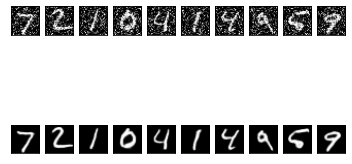

In [ ]:
for i in range(10):
  ax = plt.subplot(2,10,i+1)
  plt.imshow(noisy_test_data[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  
  ax = plt.subplot(2,10,i+1+10)
  plt.imshow(predictions[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()